In [12]:
import pandas as pd
import numpy as np

In [13]:
df=pd.read_csv('C:/Projects/Ecommerce_sales_analysis/data/raw/csv_file/synthetic_ecommerce_data.csv')
df.head(2)

,Transaction_ID,Customer_ID,Product_ID,Transaction_Date,Units_Sold,Discount_Applied,Revenue,Clicks,Impressions,Conversion_Rate,Category,Region,Ad_CTR,Ad_CPC,Ad_Spend
0,8b460852-7c64-46fa-998b-b0976879d082,Customer_65,Product_224,2024-10-06,134,0.14,305.54,11,65,0.17,Electronics,Europe,0.0180,0.55,9.90
1,418612e7-8744-4ba3-bb0c-105b47e2a968,Customer_1910,Product_584,2024-10-29,109,0.30,1102.19,15,201,0.07,Home Appliances,Asia,0.1589,0.40,63.56


In [14]:
df.shape

(100000, 15)

In [15]:
df.describe()

,Units_Sold,Discount_Applied,Revenue,Clicks,Impressions,Conversion_Rate,Ad_CTR,Ad_CPC,Ad_Spend
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,128.328580,0.149871,553.110811,24.539170,254.539060,0.198138,0.104988,1.051250,110.477240
std,49.679873,0.086692,428.366294,14.412477,141.466606,0.361187,0.054806,0.549252,87.015846
min,51.000000,0.000000,7.650000,0.000000,10.000000,0.000000,0.010000,0.100000,1.050000
25%,84.000000,0.070000,221.260000,12.000000,132.000000,0.050000,0.057500,0.580000,38.610000
50%,127.000000,0.150000,428.155000,25.000000,254.000000,0.100000,0.105200,1.050000,87.240000
75%,166.000000,0.220000,805.865000,37.000000,377.000000,0.190000,0.152300,1.530000,164.220000
max,716.000000,0.300000,5704.180000,49.000000,499.000000,4.900000,0.200000,2.000000,399.600000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Transaction_ID    100000 non-null  object 
 1   Customer_ID       100000 non-null  object 
 2   Product_ID        100000 non-null  object 
 3   Transaction_Date  100000 non-null  object 
 4   Units_Sold        100000 non-null  int64  
 5   Discount_Applied  100000 non-null  float64
 6   Revenue           100000 non-null  float64
 7   Clicks            100000 non-null  int64  
 8   Impressions       100000 non-null  int64  
 9   Conversion_Rate   100000 non-null  float64
 10  Category          100000 non-null  object 
 11  Region            100000 non-null  object 
 12  Ad_CTR            100000 non-null  float64
 13  Ad_CPC            100000 non-null  float64
 14  Ad_Spend          100000 non-null  float64
dtypes: float64(6), int64(3), object(6)
memory usage: 11.4+ MB


In [17]:
duplicates=df.duplicated()

In [18]:
duplicates.any()

np.False_

In [19]:
df['Transaction_Date']=pd.to_datetime(df['Transaction_Date'])

In [20]:
df.dtypes

Transaction_ID              object
Customer_ID                 object
Product_ID                  object
Transaction_Date    datetime64[ns]
Units_Sold                   int64
Discount_Applied           float64
Revenue                    float64
Clicks                       int64
Impressions                  int64
Conversion_Rate            float64
Category                    object
Region                      object
Ad_CTR                     float64
Ad_CPC                     float64
Ad_Spend                   float64
dtype: object

In [21]:
df.isnull().sum()

Transaction_ID      0
Customer_ID         0
Product_ID          0
Transaction_Date    0
Units_Sold          0
Discount_Applied    0
Revenue             0
Clicks              0
Impressions         0
Conversion_Rate     0
Category            0
Region              0
Ad_CTR              0
Ad_CPC              0
Ad_Spend            0
dtype: int64

In [22]:
df['Profit']=df['Revenue']-df['Ad_Spend']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Transaction_ID    100000 non-null  object        
 1   Customer_ID       100000 non-null  object        
 2   Product_ID        100000 non-null  object        
 3   Transaction_Date  100000 non-null  datetime64[ns]
 4   Units_Sold        100000 non-null  int64         
 5   Discount_Applied  100000 non-null  float64       
 6   Revenue           100000 non-null  float64       
 7   Clicks            100000 non-null  int64         
 8   Impressions       100000 non-null  int64         
 9   Conversion_Rate   100000 non-null  float64       
 10  Category          100000 non-null  object        
 11  Region            100000 non-null  object        
 12  Ad_CTR            100000 non-null  float64       
 13  Ad_CPC            100000 non-null  float64       
 14  Ad_Sp

In [23]:
df['Category'].head()

0        Electronics
1    Home Appliances
2               Toys
3           Clothing
4              Books
Name: Category, dtype: object

In [24]:
df['Category'].sample()

15452    Home Appliances
Name: Category, dtype: object

### Sales-
Which category earns most revenue?
Which region buys the most?
Monthly revenue trend?

In [25]:
# Total Revenue
df['Revenue'].sum()

np.float64(55311081.07000001)

In [26]:
df.groupby('Category')

In [27]:
# Revenue by category
df.groupby('Category')['Revenue'].sum().sort_values(ascending=False)

Category
Electronics        11326820.25
Books              11195311.88
Toys               11194842.46
Clothing           11034899.26
Home Appliances    10559207.22
Name: Revenue, dtype: float64

In [28]:
# Revenue by region
df.groupby('Region')['Revenue'].sum().sort_values(ascending=False)

Region
Asia             18492871.13
North America    18419228.61
Europe           18398981.33
Name: Revenue, dtype: float64

In [29]:
# MOnthly revenue trend
monthly_revenue=(
    df.groupby(df['Transaction_Date'].dt.to_period('M'))['Revenue'].sum()
    )
monthly_revenue

Transaction_Date
2023-12    3723069.77
2024-01    4665609.02
2024-02    4312157.04
2024-03    4705422.31
2024-04    4406829.73
2024-05    4645304.43
2024-06    4614620.94
2024-07    4572138.90
2024-08    4579761.33
2024-09    4551504.34
2024-10    4771718.89
2024-11    4828945.03
2024-12     933999.34
Freq: M, Name: Revenue, dtype: float64

In [30]:
# .corr()=calculates the correlation between numeric columns.
df[['Units_Sold','Revenue']].corr()

,Units_Sold,Revenue
Units_Sold,1.000000,0.044226
Revenue,0.044226,1.000000


In [31]:
df['Price']=df['Revenue']/df['Units_Sold']
df.dtypes
df[['Units_Sold','Price','Revenue']].corr()

,Units_Sold,Price,Revenue
Units_Sold,1.000000,-0.396742,0.044226
Price,-0.396742,1.000000,0.817511
Revenue,0.044226,0.817511,1.000000


In [32]:
#discount impact
df[['Discount_Applied','Revenue']].corr()

,Discount_Applied,Revenue
Discount_Applied,1.000000,-0.129227
Revenue,-0.129227,1.000000


Discounts are not increasing revenue,they are slighty decreasing it.

In [33]:
df.groupby('Category')[['Units_Sold','Revenue']].corr()

Units_Sold   Revenue
Category                                        
Books           Units_Sold    1.000000  0.064329
                Revenue       0.064329  1.000000
Clothing        Units_Sold    1.000000  0.069150
                Revenue       0.069150  1.000000
Electronics     Units_Sold    1.000000  0.045615
                Revenue       0.045615  1.000000
Home Appliances Units_Sold    1.000000  0.040851
                Revenue       0.040851  1.000000
Toys            Units_Sold    1.000000  0.042216
                Revenue       0.042216  1.000000

In [34]:
#Price focused analysis
df.groupby('Category')['Price'].mean()

Category
Books              5.817189
Clothing           5.165211
Electronics        4.361474
Home Appliances    5.152752
Toys               4.677665
Name: Price, dtype: float64

<Axes: xlabel='Category'>

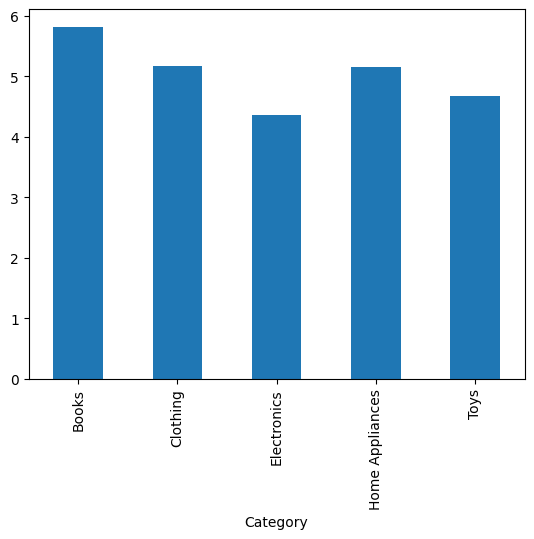

In [35]:
df.groupby('Category')['Price'].mean().plot(kind='bar')

so no correlation as the value is less than 0.10-0.30 

In [37]:
df.to_csv("../data/processed/cleaned_ecommerce_data.csv", index=False)
